# Exploring The Historical Voting of USGA

> Using data manipulation and visualization skills to explore the historical voting of the United Nations General Assembly.

- author: Victor Omondi
- toc: true
- comments: true
- categories: [eda, data-analysis, r]
- image:images/eda-usga-shield.png

# Overview

We'll explore the historical voting of the United Nations General Assembly, including analyzing differences in voting between countries, across time, and among international issues. We'll be using dplyr and ggplot2 packages, broom package for tidying model output, and experience the kind of start-to-finish exploratory analysis common in data science.

# Libraries

In [49]:
library(dplyr)
library(countrycode)
library(ggplot2)
library(tidyr)
library(broom)
library(purrr)

Warning message:
"package 'purrr' was built under R version 3.6.3"

# Data cleaning and summarizing with dplyr

The best way to use data wrangling skills is to apply them to a specific case study. Here we'll explore how to clean and filter the United Nations voting dataset using the dplyr package, and how to summarize it into smaller, interpretable units.

## The United Nations Voting Dataset



In [3]:
voting <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/420/datasets/ddfa750d993c73026f621376f3c187f276bf0e2a/votes.rds")))
head(voting)

rcid,session,vote,ccode
46,2,1,2
46,2,1,20
46,2,9,31
46,2,1,40
46,2,1,41
46,2,1,42


- each row is a country vote pair
- `rcid` roll call id
- `session` session (year)
- `ccode` country code
- `votes`
  - 1 = Yes
  - 2 = Abstain
  - 3 = No
  - 8 = Not present
  - 9 = Not a member


In [4]:
unique(voting$vote)

[1] 1 9 8 3 2

In [5]:
table(voting$vote)


     1      2      3      8      9 
282811  45442  25294  36593 118789 

> ### dplyr verbs
- `filter` - keeps observations based on a condition
- `mutate` - adds an additional variable

In [6]:
# Filter for votes that are "yes", "abstain", or "no"
votes_processed <- voting %>%
  filter(vote<=3) %>%
    # Add another %>% step to add a year column
    mutate(year=session+1945)
head(votes_processed)

rcid,session,vote,ccode,year
46,2,1,2,1947
46,2,1,20,1947
46,2,1,40,1947
46,2,1,41,1947
46,2,1,42,1947
46,2,1,70,1947


### Adding a country column

The country codes in the `ccode` column are what's called [Correlates of War codes](http://cow.dss.ucdavis.edu/data-sets/cow-country-codes). This isn't ideal for an analysis, since we'd like to work with recognizable country names.

In [7]:
votes_processed<- votes_processed %>%
    mutate(year = session + 1945, country=countrycode(ccode, "cown", "country.name"))
head(votes_processed)

Warning message in countrycode(ccode, "cown", "country.name"):
"Some values were not matched unambiguously: 260
"

rcid,session,vote,ccode,year,country
46,2,1,2,1947,United States
46,2,1,20,1947,Canada
46,2,1,40,1947,Cuba
46,2,1,41,1947,Haiti
46,2,1,42,1947,Dominican Republic
46,2,1,70,1947,Mexico


## Grouping and summarizing

> ### Using “% of Yes votes” as a summary
- `summarize()` turns many rows into one

In [8]:
votes_processed %>%
    summarise(total=n())

total
353547


In [9]:
votes_processed %>%
    summarise(total=n(), percent_yes=mean(vote==1))

total,percent_yes
353547,0.7999248


> - `mean(vote == 1)` is a way of calculating “percent of vote equal to 1”
- `group_by()` before `summarize()` turns groups into one row each


In [12]:
head(votes_processed %>%
    group_by(year) %>%
        summarise(total=n(), percent_year=mean(vote==1)), 
     10)

`summarise()` ungrouping output (override with `.groups` argument)


year,total,percent_year
1947,2039,0.5693968
1949,3469,0.4375901
1951,1434,0.5850767
1953,1537,0.6317502
1955,2169,0.6947902
1957,2708,0.6085672
1959,4326,0.5880721
1961,7482,0.5729751
1963,3308,0.7294438
1965,4382,0.7078959


In [13]:
# Summarize by country: by_country
head(by_country<- votes_processed %>%
    group_by(country) %>%
        summarize(total = n(), percent_yes = mean(vote == 1)),
     10)

`summarise()` ungrouping output (override with `.groups` argument)


country,total,percent_yes
Afghanistan,2373,0.8592499
Albania,1695,0.7174041
Algeria,2213,0.8992318
Andorra,719,0.6383866
Angola,1431,0.9238295
Antigua & Barbuda,1302,0.9124424
Argentina,2553,0.7677242
Armenia,758,0.7467018
Australia,2575,0.5565049
Austria,2389,0.6224362


## Sorting and filtering summarized data
- `arrange` - sorts a table based on a variable

In [14]:
head(by_country %>%
    arrange(percent_yes), 
    10)

country,total,percent_yes
Zanzibar,2,0.0000000
United States,2568,0.2694704
Palau,369,0.3387534
Israel,2380,0.3407563
NA,1075,0.3972093
United Kingdom,2558,0.4167318
France,2527,0.4265928
Micronesia (Federated States of),724,0.4419890
Marshall Islands,757,0.4914135
Belgium,2568,0.4922118


In [15]:
head(by_country %>% 
     arrange(desc(percent_yes)),
     10)

country,total,percent_yes
São Tomé & Príncipe,1091,0.9761687
Seychelles,881,0.9750284
Djibouti,1598,0.9612015
Guinea-Bissau,1538,0.9603381
Timor-Leste,326,0.9570552
Mauritius,1831,0.9497542
Zimbabwe,1361,0.9493020
Comoros,1133,0.9470432
United Arab Emirates,1934,0.9467425
Mozambique,1701,0.9465021


### Filtering summarized output

 Zanzibar, had only 2 votes in the entire dataset. We certainly can't make any substantial conclusions based on that data!

In [18]:
head(by_country %>%
     arrange(percent_yes) %>%
         filter(total>=100), 
     10)

country,total,percent_yes
United States,2568,0.2694704
Palau,369,0.3387534
Israel,2380,0.3407563
NA,1075,0.3972093
United Kingdom,2558,0.4167318
France,2527,0.4265928
Micronesia (Federated States of),724,0.4419890
Marshall Islands,757,0.4914135
Belgium,2568,0.4922118
Canada,2576,0.5081522


# Data visualization with ggplot2

Once we've cleaned and summarized data, we'll visualize them to understand trends and extract insights. Here we'll use the ggplot2 package to explore trends in United Nations voting within each country over time.

## Visualization with ggplot2
> ### Visualizing by-year data

In [19]:
head(by_year <- votes_processed %>%
    group_by(year) %>%
        summarise(total = n(), percent_yes = mean(vote==1)), 
     10)

`summarise()` ungrouping output (override with `.groups` argument)


year,total,percent_yes
1947,2039,0.5693968
1949,3469,0.4375901
1951,1434,0.5850767
1953,1537,0.6317502
1955,2169,0.6947902
1957,2708,0.6085672
1959,4326,0.5880721
1961,7482,0.5729751
1963,3308,0.7294438
1965,4382,0.7078959


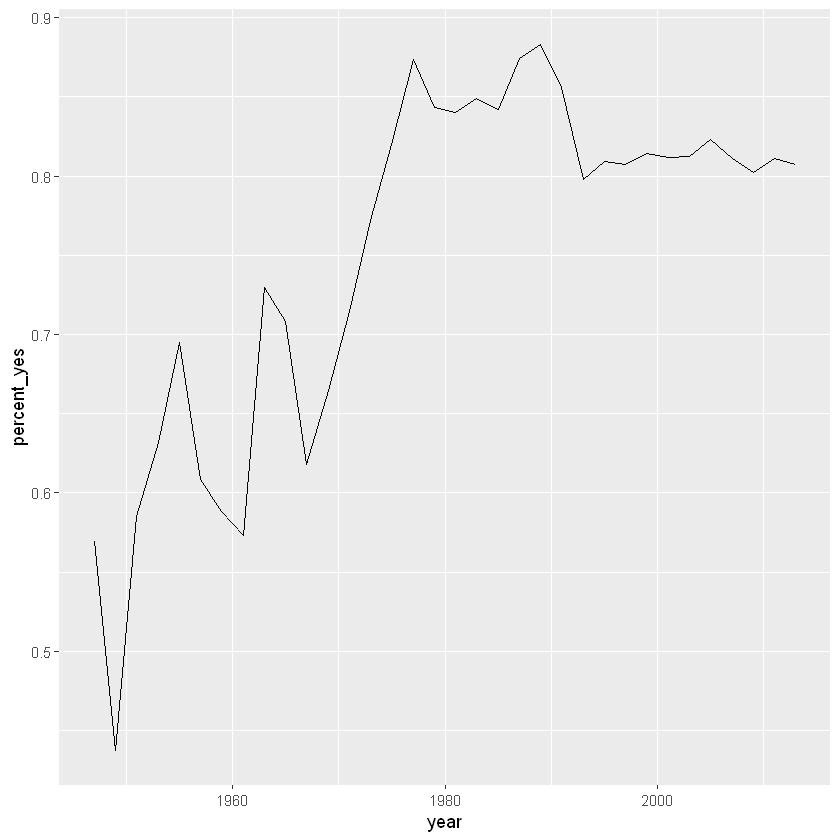

In [23]:
by_year %>%
    ggplot(aes(x=year, y=percent_yes)) + 
    geom_line()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


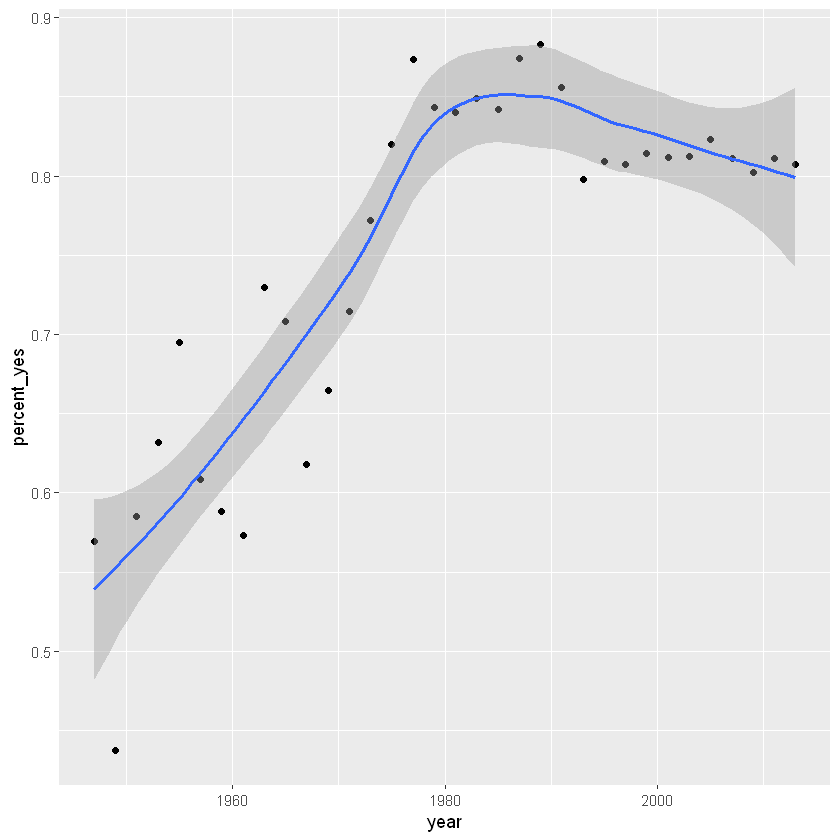

In [24]:
# Change to scatter plot and add smoothing curve
ggplot(by_year, aes(year, percent_yes)) +
  geom_point() +
  geom_smooth()
  

## Visualizing by country


In [25]:
head(by_year_country <- votes_processed %>%
     group_by(year, country) %>%
         summarise(total=n(), percent_yes=mean(vote==1)), 
     10)

`summarise()` regrouping output by 'year' (override with `.groups` argument)


year,country,total,percent_yes
1947,Afghanistan,34,0.3823529
1947,Argentina,38,0.5789474
1947,Australia,38,0.5526316
1947,Belarus,38,0.5000000
1947,Belgium,38,0.6052632
1947,Bolivia,37,0.5945946
1947,Brazil,38,0.6578947
1947,Canada,38,0.6052632
1947,Chile,38,0.6578947
1947,Colombia,35,0.5428571


> ### Filtering for one country

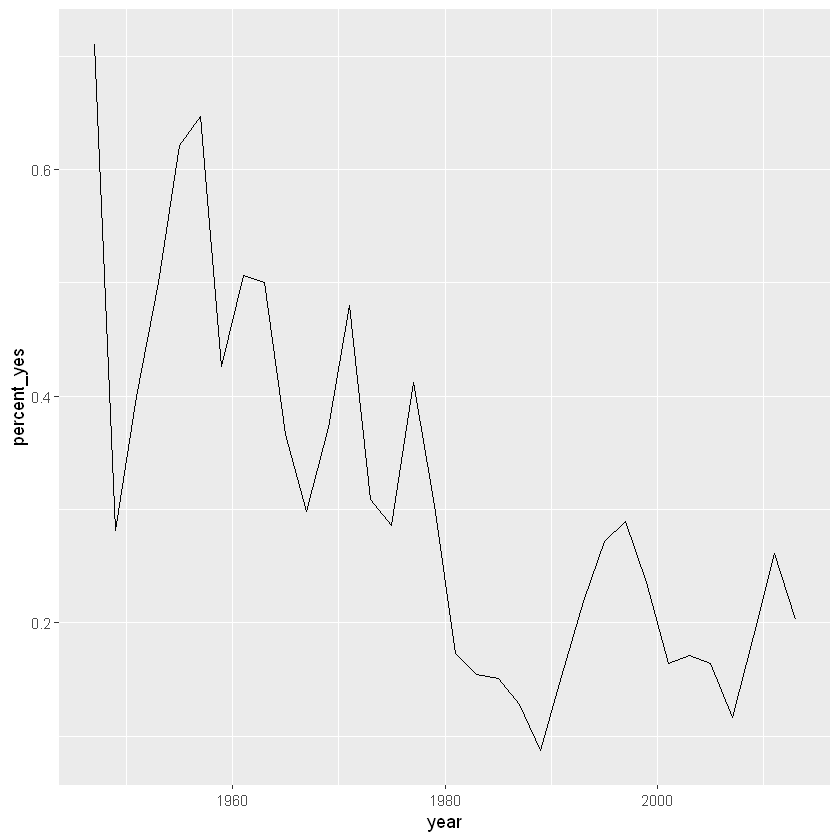

In [26]:
by_year_country %>%
    filter(country=="United States") %>%
        ggplot(aes(x=year, y=percent_yes)) +
        geom_line()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


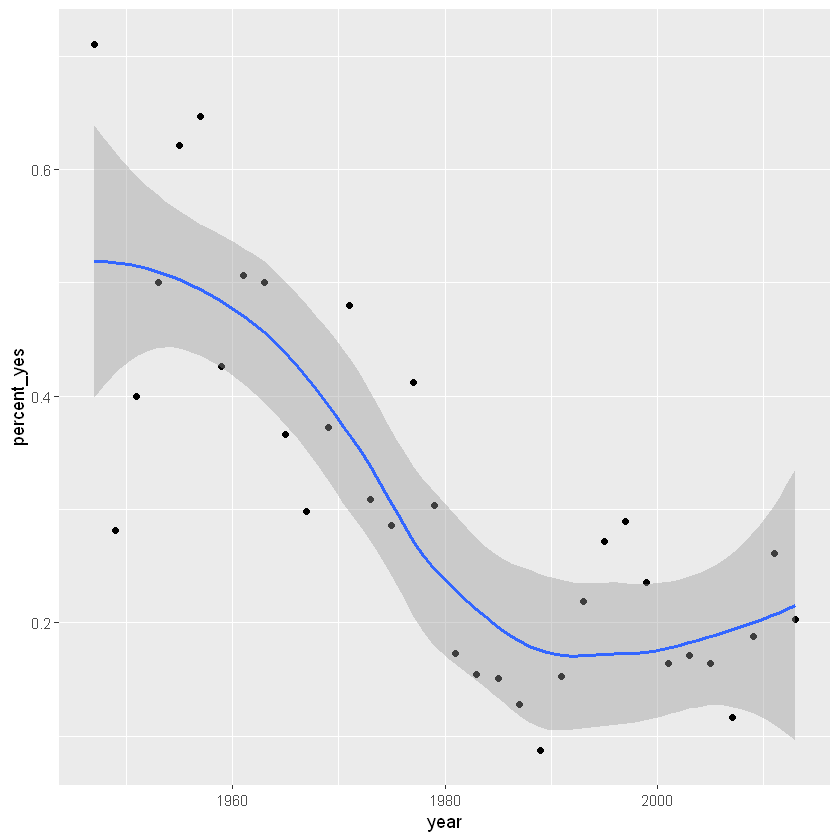

In [27]:
by_year_country %>%
    filter(country=="United States") %>%
        ggplot(aes(x=year, y=percent_yes)) +
        geom_point() +
        geom_smooth()

> ### Filtering for multiple countries



In [28]:
head(us_france <- by_year_country %>%
    filter(country %in% c("United States", "France")), 10)

year,country,total,percent_yes
1947,France,38,0.7368421
1947,United States,38,0.7105263
1949,France,64,0.3125000
1949,United States,64,0.2812500
1951,France,25,0.3600000
1951,United States,25,0.4000000
1953,France,18,0.3333333
1953,United States,26,0.5000000
1955,France,27,0.7407407
1955,United States,37,0.6216216


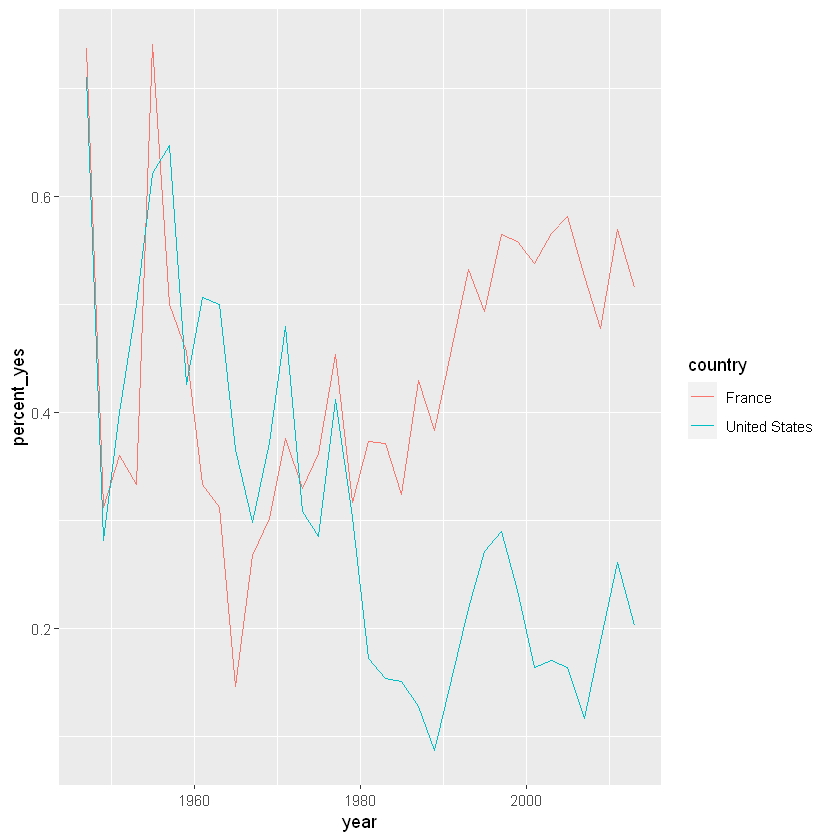

In [29]:
us_france %>%
    ggplot(aes(x=year, y=percent_yes, color=country)) +
    geom_line()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


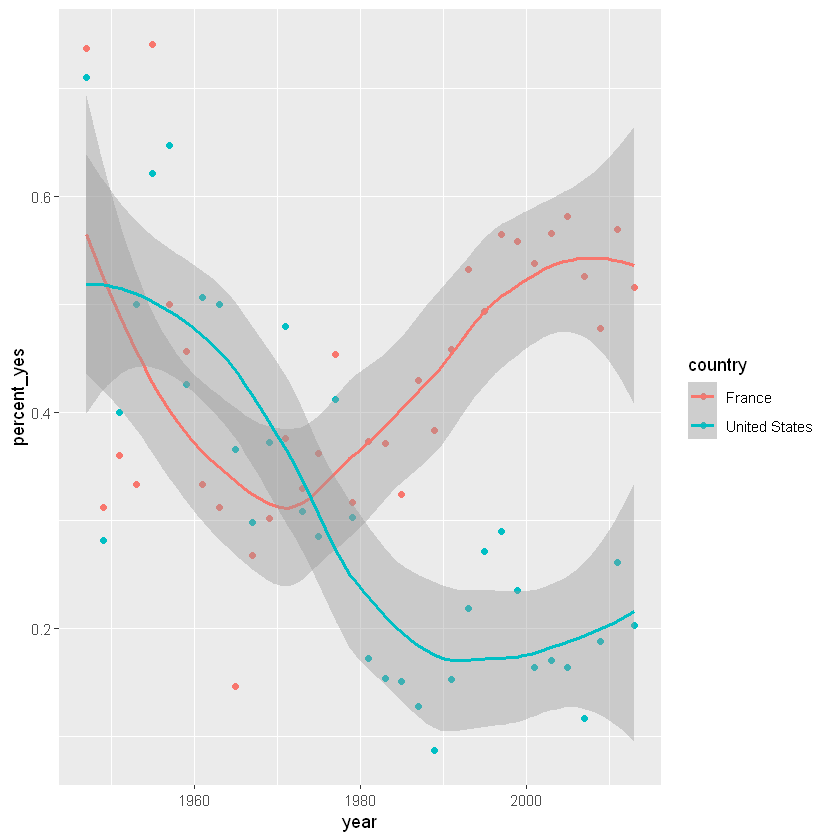

In [30]:
us_france %>%
    ggplot(aes(x=year, y=percent_yes, color=country)) +
    geom_point() +
    geom_smooth()

### Plotting just the UK over time

Now that we have the percentage of time that each country voted "yes" within each year, we can plot the trend for a particular country. In this case, we'll look at the trend for just the United Kingdom

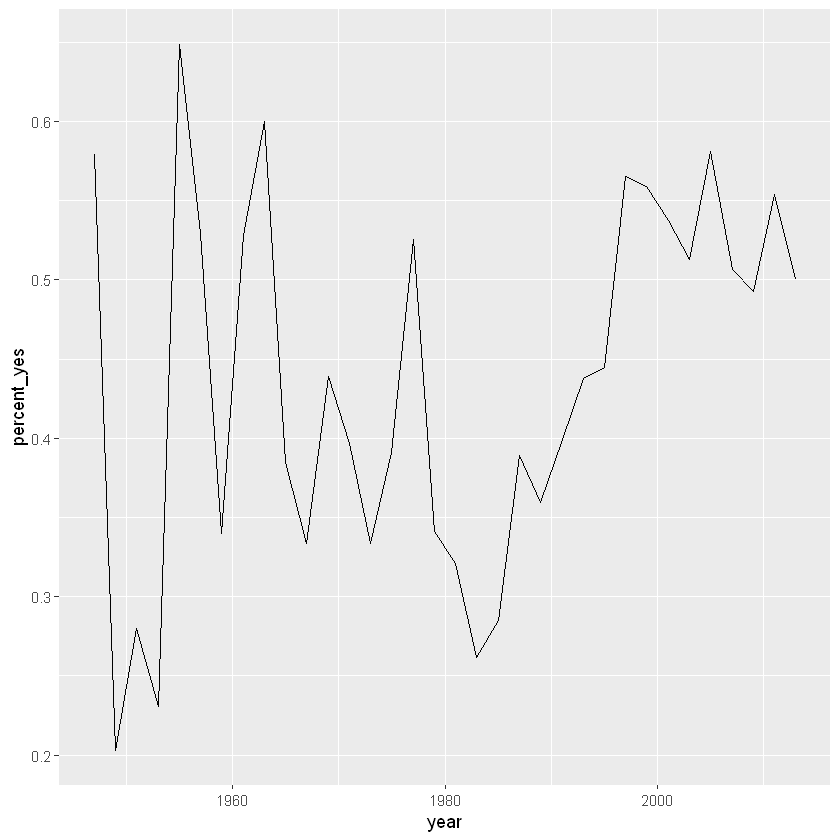

In [31]:
by_year_country %>%
    filter(country=="United Kingdom") %>%
        ggplot(aes(x=year, y=percent_yes)) +
        geom_line()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


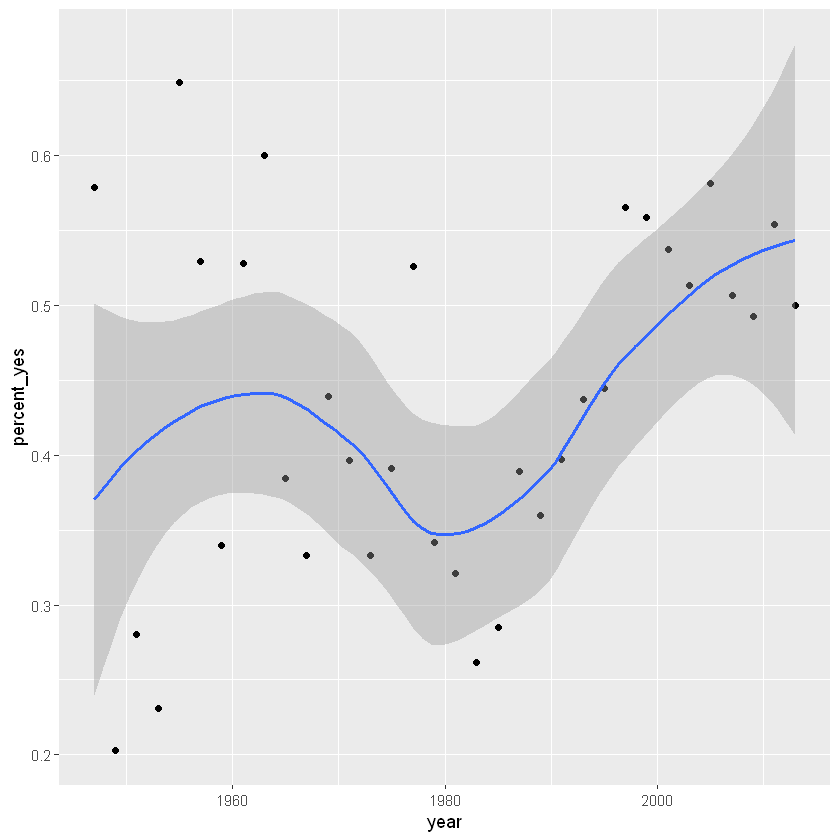

In [32]:
by_year_country %>%
    filter(country=="United Kingdom") %>%
        ggplot(aes(x=year, y=percent_yes)) +
        geom_point() +
        geom_smooth()

### Plotting multiple countries

Plotting just one country at a time is interesting, but we really want to compare trends between countries. For example, suppose we want to compare voting trends for the United States, the UK, France, and India.

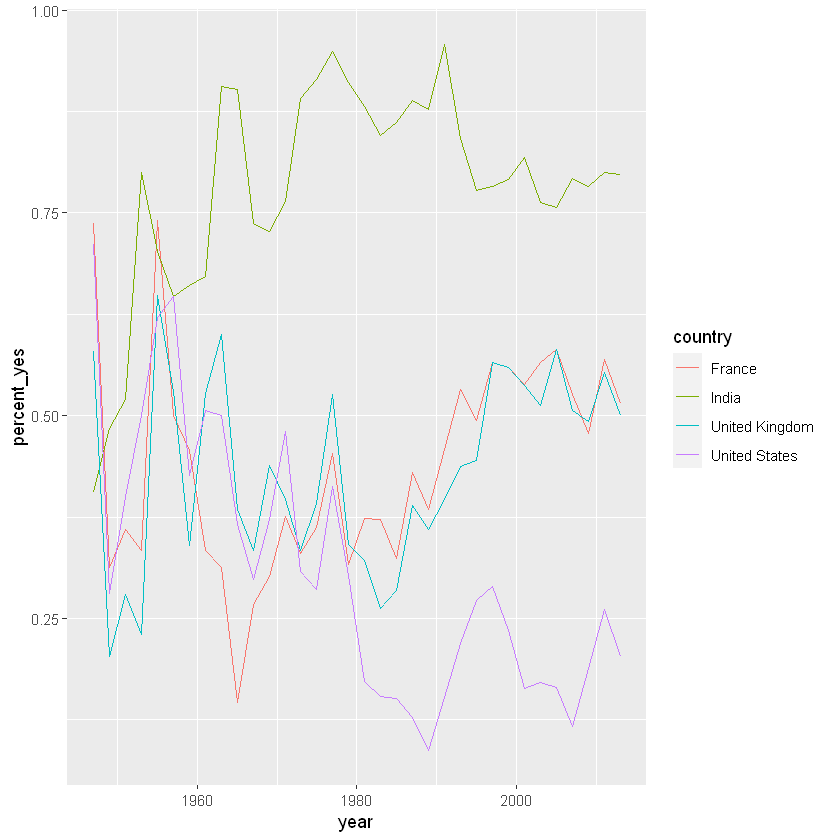

In [33]:
by_year_country %>%
    filter(country %in% c("United States", "United Kingdom", "France", "India")) %>%
        ggplot(aes(x=year, y=percent_yes, color=country)) +
        geom_line()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


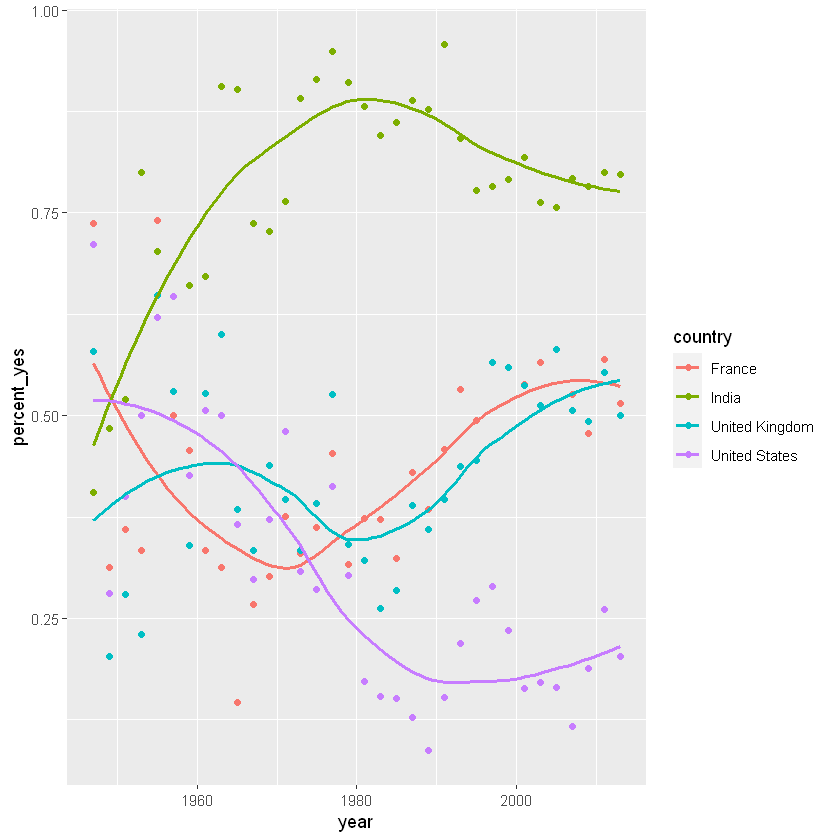

In [34]:
by_year_country %>%
    filter(country %in% c("United States", "United Kingdom", "France", "India")) %>%
        ggplot(aes(x=year, y=percent_yes, color=country)) +
        geom_point() +
        geom_smooth(se=F)

## Faceting by country

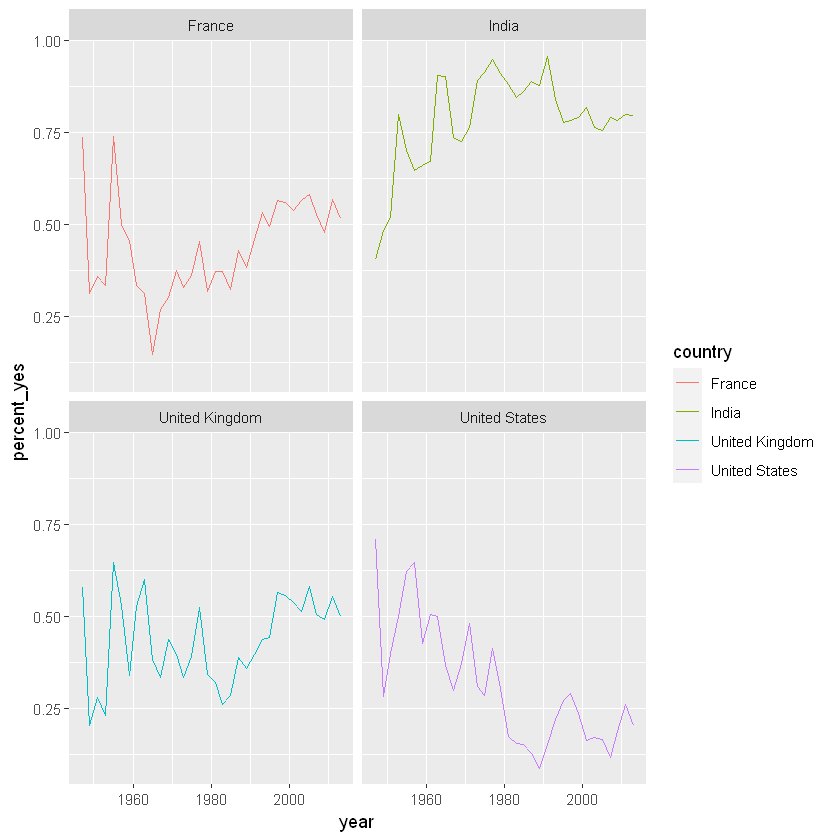

In [36]:
by_year_country %>%
    filter(country %in% c("United States", "United Kingdom", "France", "India")) %>%
        ggplot(aes(x=year, y=percent_yes, color=country)) +
        geom_line() +
        facet_wrap(~country)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


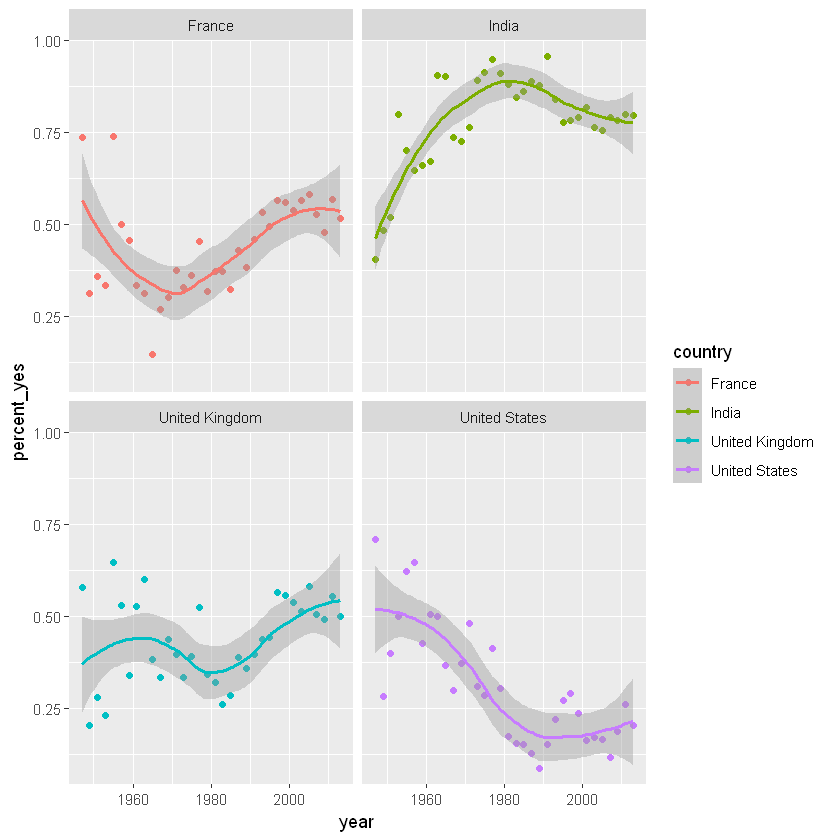

In [37]:
by_year_country %>%
    filter(country %in% c("United States", "United Kingdom", "France", "India")) %>%
        ggplot(aes(x=year, y=percent_yes, color=country)) +
        geom_point() +
        geom_smooth() +
        facet_wrap(~country)

> ### Graphing on separate scales

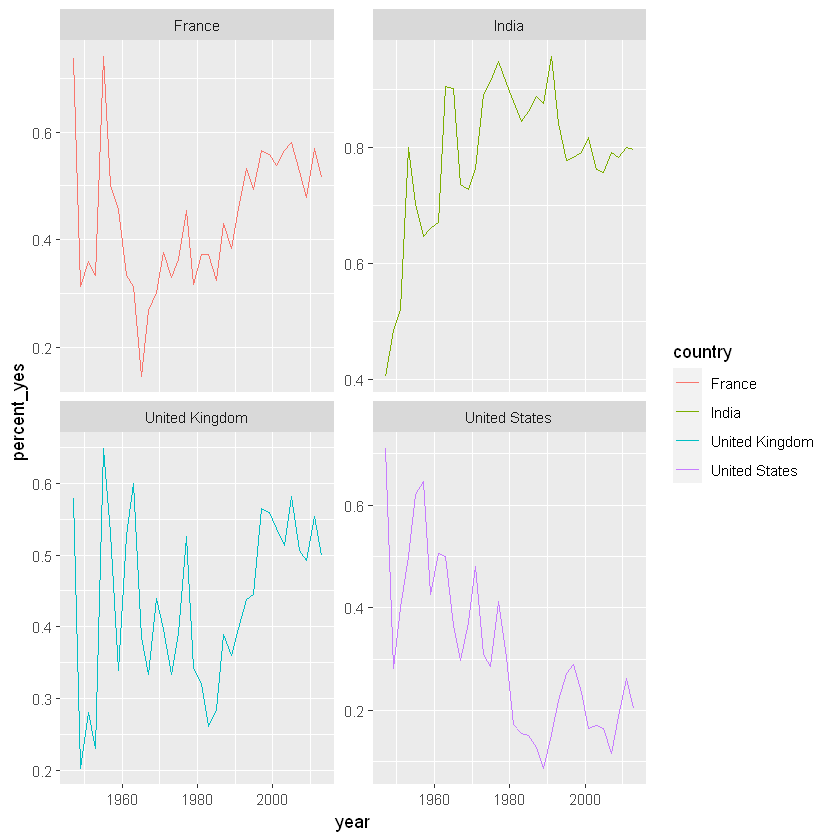

In [38]:
by_year_country %>%
    filter(country %in% c("United States", "United Kingdom", "France", "India")) %>%
        ggplot(aes(x=year, y=percent_yes, color=country)) +
        geom_line() +
        facet_wrap(~country, scales = "free_y")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


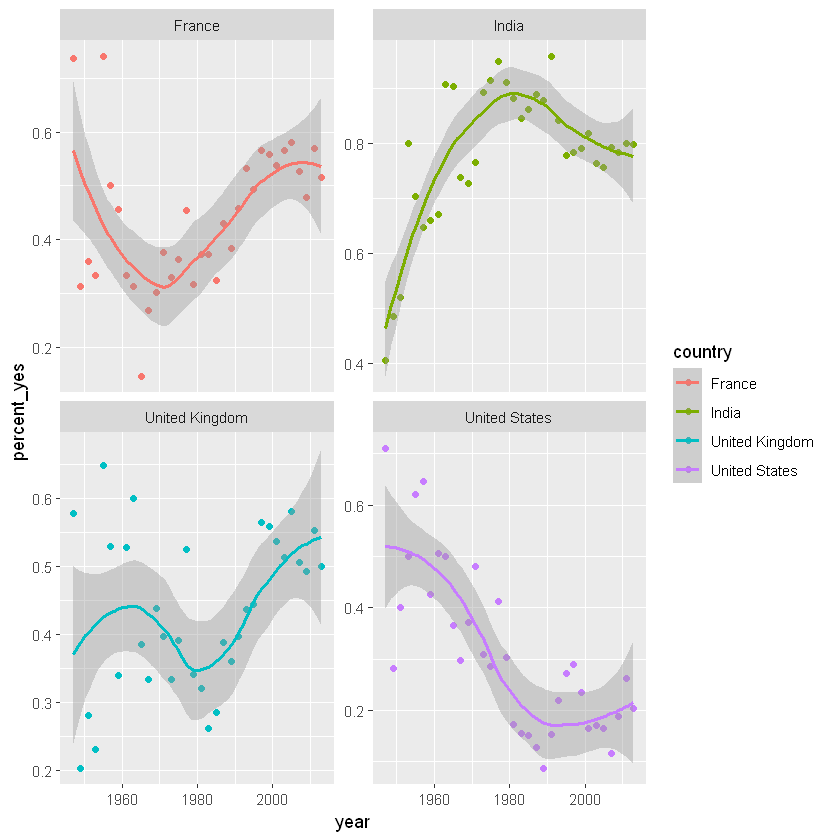

In [39]:
by_year_country %>%
    filter(country %in% c("United States", "United Kingdom", "France", "India")) %>%
        ggplot(aes(x=year, y=percent_yes, color=country)) +
        geom_point() +
        geom_smooth() +
        facet_wrap(~country, scales = "free_y")

### Faceting the time series

Now we'll take a look at six countries.

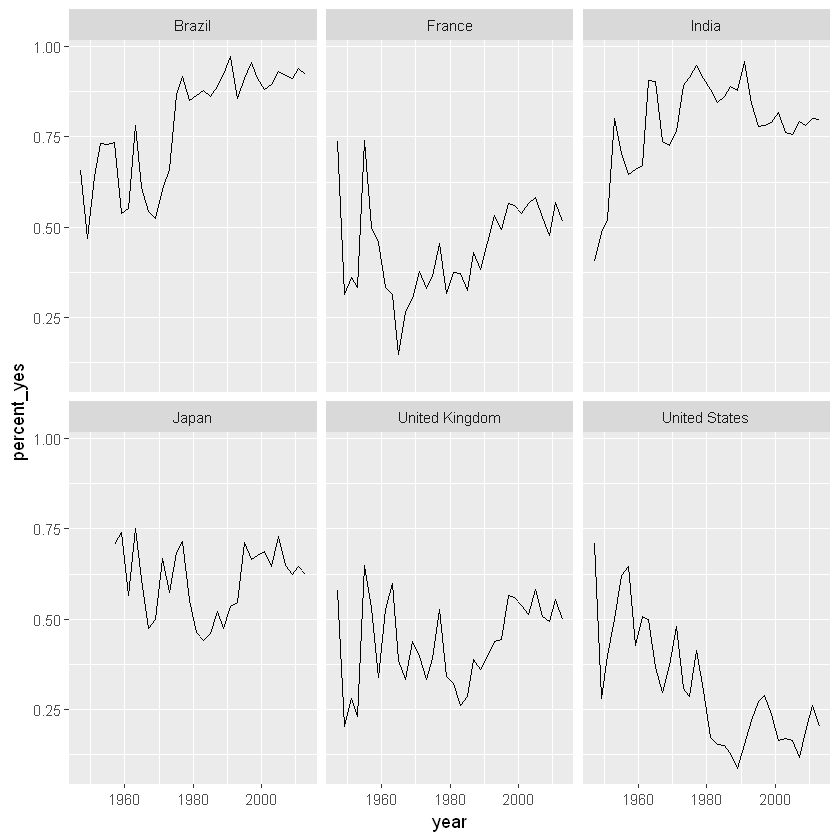

In [41]:
by_year_country %>%
    filter(country %in% c("United States", "United Kingdom","France", "Japan", "Brazil", "India")) %>%
        ggplot(aes(x=year, y=percent_yes)) +
        geom_line() +
        facet_wrap(~country)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


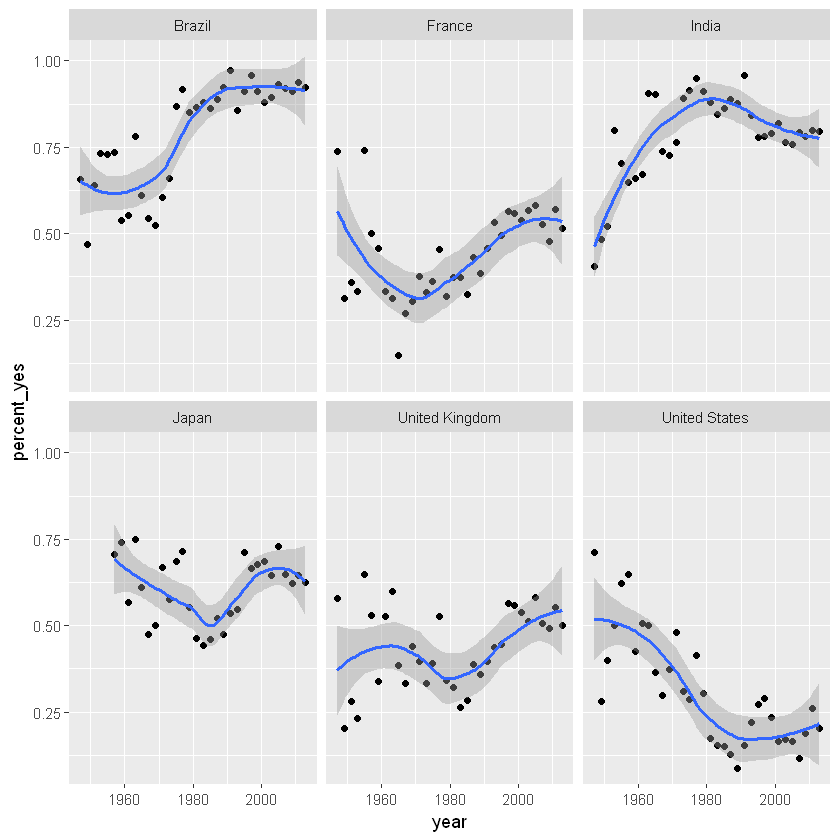

In [42]:
by_year_country %>%
    filter(country %in% c("United States", "United Kingdom","France", "Japan", "Brazil", "India")) %>%
        ggplot(aes(x=year, y=percent_yes)) +
        geom_point() +
        geom_smooth() +
        facet_wrap(~country)

### Faceting with free y-axis

In the previous plot, all six graphs had the same axis limits. This made the changes over time hard to examine for plots with relatively little change.

Instead, we may want to let the plot choose a different y-axis for each facet.

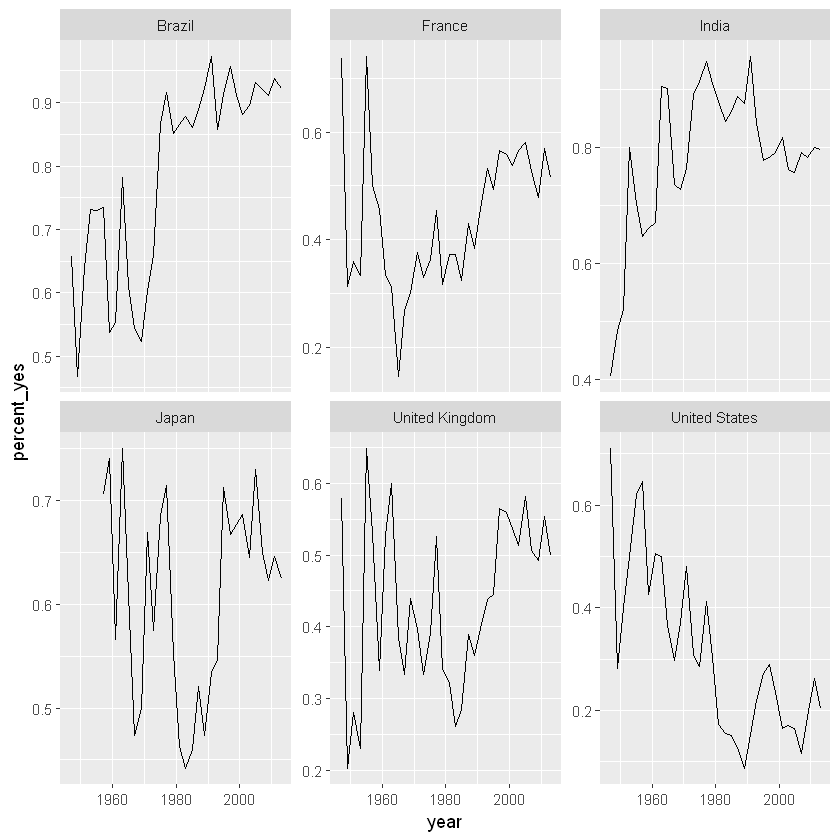

In [43]:
by_year_country %>%
    filter(country %in% c("United States", "United Kingdom","France", "Japan", "Brazil", "India")) %>%
        ggplot(aes(x=year, y=percent_yes)) +
        geom_line() +
        facet_wrap(~country, scales = "free_y")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


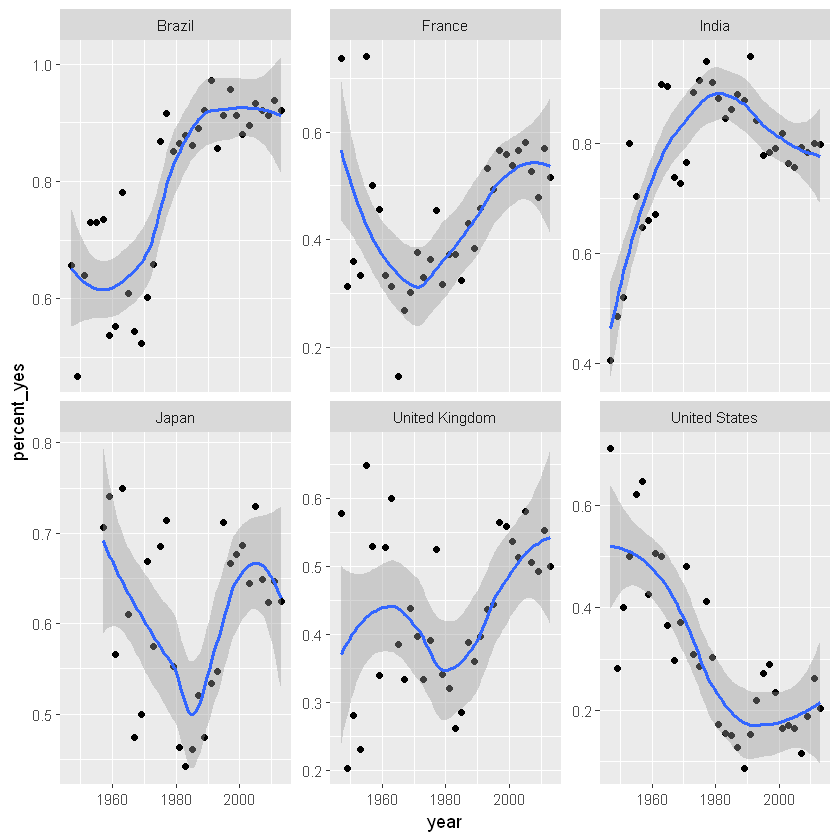

In [44]:
by_year_country %>%
    filter(country %in% c("United States", "United Kingdom","France", "Japan", "Brazil", "India")) %>%
        ggplot(aes(x=year, y=percent_yes)) +
        geom_point() +
        geom_smooth() +
        facet_wrap(~country, scales = "free_y")

### Choose our own countries

Let's see the trend in East Africa

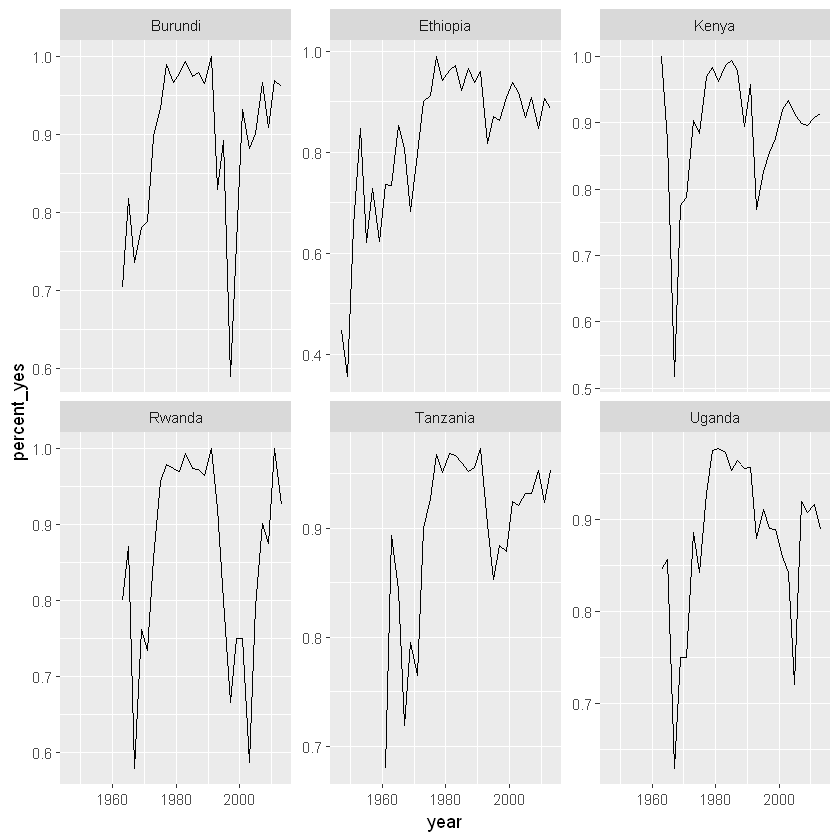

In [45]:
by_year_country %>%
    filter(country %in% c("Kenya", "Uganda","Tanzania", "Rwanda", "Burundi", "Ethiopia")) %>%
        ggplot(aes(x=year, y=percent_yes)) +
        geom_line() +
        facet_wrap(~country, scales = "free_y")

`geom_smooth()` using method = 'loess' and formula 'y ~ x'


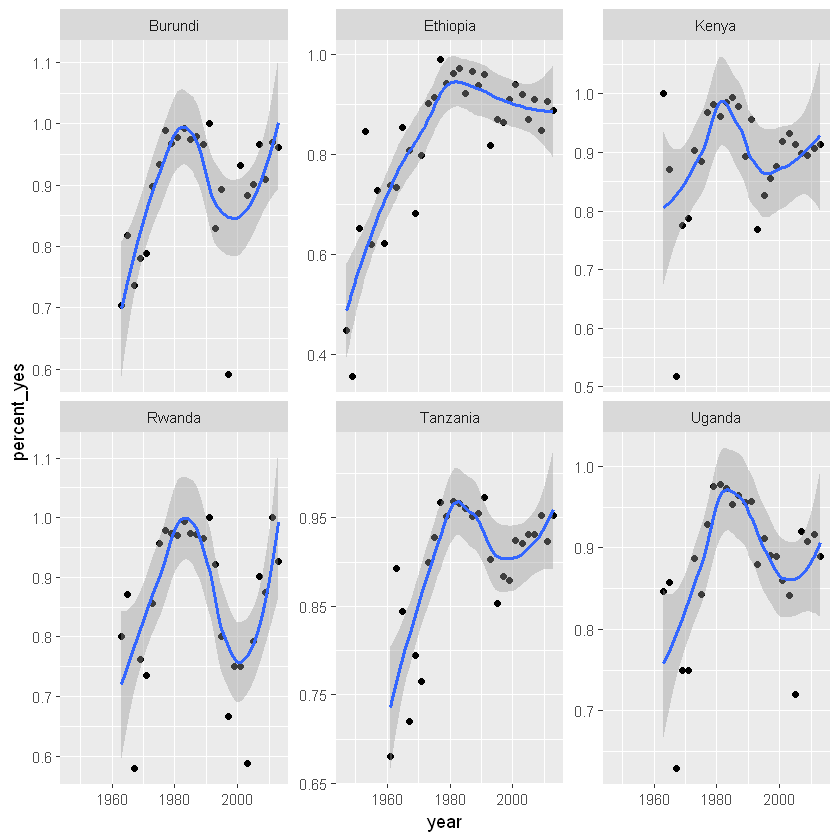

In [46]:
by_year_country %>%
    filter(country %in% c("Kenya", "Uganda","Tanzania", "Rwanda", "Burundi", "Ethiopia")) %>%
        ggplot(aes(x=year, y=percent_yes)) +
        geom_point() +
        geom_smooth() +
        facet_wrap(~country, scales = "free_y")

# Tidy modeling with broom

While visualization helps us understand one country at a time, statistical modeling lets us quantify trends across many countries and interpret them together. Here we'll using tidyr, purrr, and broom packages to fit linear models to each country, and understand and compare their outputs.

## Linear regression
